In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def fx(x):
    y=np.sin(x)
    return y

In [62]:
def generate_fx(N):
    x=np.random.random(N)* 2 *np.pi
    yd=fx(x)
    return x,yd

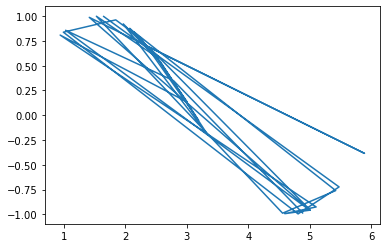

In [63]:
x,yd=generate_fx(30)
plt.plot(x,yd)#Not sorted

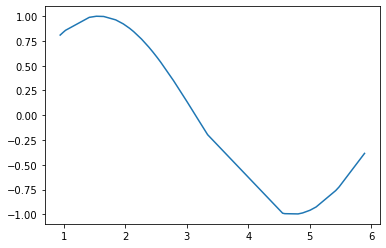

In [64]:
i=x.argsort()
plt.plot(x[i],yd[i])

In [74]:
def createA(x,D):
    N=x.shape[0]
    A=np.ones((N,D+1))
    for d in range(1,D+1):
        A[:,d]=np.power(x,d)
    return A
    

In [75]:
x=np.array([1,2,3])
x

array([1, 2, 3])

In [76]:
frame=createA(x,2)
frame

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [77]:
def train_w(A,yd):
    N=yd.shape[0]
    D=A.shape[1]-1
    if N >D+1:
        w=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(yd)
    elif N<D+1:
        w=A.T.dot(np.linalg.inv(A.dot(A.T))).dot(yd)
        
    return w

In [78]:
def predict_y(w,x):
    D=w.shape[0]-1
    A=createA(x,D)
    y=A.dot(w)
    return y

In [79]:
def compute_mse(y,yd):
    mse=(y-yd).dot(y-yd)/y.shape[0]
    return mse

In [85]:
def plotmodel(x,y,yd):
    i=x.argsort()
    plt.figure()
    
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.legend(["estimated","true"])

In [86]:
def trainModel(N,D):
    x,yd=generate_fx(N)
    A=createA(x,D)
    w=train_w(A,yd)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)
    return x,y,yd,w,mse

Final Weights: [ 1.85705003e-02  9.95148049e-01  1.31572726e-03 -1.69686960e-01
  3.72488532e-03  5.69674409e-03  1.15714290e-03 -5.16519252e-04
  5.22180676e-05 -1.42102616e-06 -2.59572508e-08]
MSE: 7.899013362320799e-05


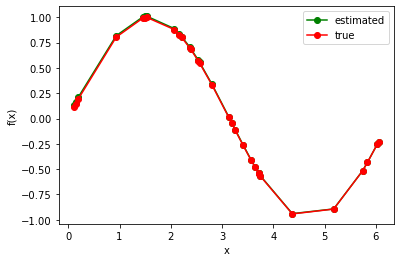

In [87]:
N=30
D=10
x,y,yd,w,mse=trainModel(N,D)
print("Final Weights:",w)
print("MSE:",mse)
plotmodel(x,y,yd)

Final Weights: [ 1.43874842e-02  1.00531220e+00  2.38557466e-02 -2.09754694e-01
  3.28434448e-02 -7.36344230e-03  5.00531449e-03 -1.25589617e-03
  1.41254550e-04 -7.51851738e-06  1.55215149e-07]
MSE: 0.00016603205203467142


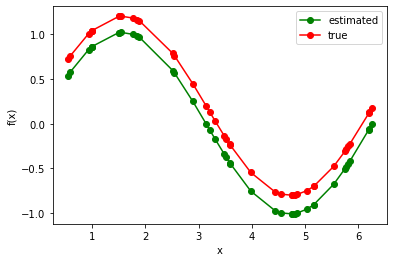

In [88]:
N=40
D=10
x,y,yd,w,mse=trainModel(N,D)
print("Final Weights:",w)
print("MSE:",mse)
plotmodel(x,y,yd + 0.2)

In [89]:
def testModel(Ntest,w):
    x,yd=generate_fx(Ntest)
    D=w.shape[0]-1
    A=createA(x,D)
    y=predict_y(w,x)
    mse=compute_mse(y,yd)
    return x,y,yd,mse

In [90]:
x,y,yd,mse=testModel(50,w)

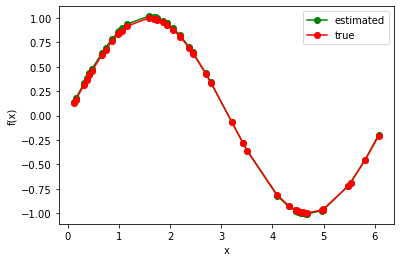

In [91]:
plotmodel(x,y,yd)

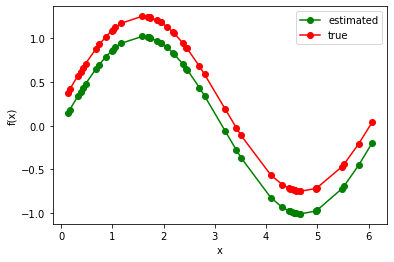

In [92]:
plotmodel(x,y,yd + 0.25)